In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
from imblearn.combine import SMOTETomek

In [115]:
#Loading the dataset after performing modifications
df = pd.read_csv("model.csv")
df.head(10)

Unnamed: 0  fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
0           0            7.4              0.70         0.00             1.9   
1           1            7.8              0.88         0.00             2.6   
2           2            7.8              0.76         0.04             2.3   
3           3           11.2              0.28         0.56             1.9   
4           4            7.4              0.70         0.00             1.9   
5           5            7.4              0.66         0.00             1.8   
6           6            7.9              0.60         0.06             1.6   
7           7            7.3              0.65         0.00             1.2   
8           8            7.8              0.58         0.02             2.0   
9           9            7.5              0.50         0.36             6.1   

   chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    pH  \
0      0.076                 11.0                  34.0   0.9978  3.51   
1      0.098                 25.0                  67.0   0.9968  3.20   
2      0.092                 15.0                  54.0   0.9970  3.26   
3      0.075                 17.0                  60.0   0.9980  3.16   
4      0.076                 11.0                  34.0   0.9978  3.51   
5      0.075                 13.0                  40.0   0.9978  3.51   
6      0.069                 15.0                  59.0   0.9964  3.30   
7      0.065                 15.0                  21.0   0.9946  3.39   
8      0.073                  9.0                  18.0   0.9968  3.36   
9      0.071                 17.0                 102.0   0.9978  3.35   

   sulphates  alcohol  quality    wine_quality  
0       0.56      9.4        5     Low Quality  
1       0.68      9.8        5     Low Quality  
2       0.65      9.8        5     Low Quality  
3       0.58      9.8        6  Medium Quality  
4       0.56      9.4        5     Low Quality  
5       0.56      9.4        5     Low Quality  
6       0.46      9.4        5     Low Quality  
7       0.47     10.0        7    High Quality  
8       0.57      9.5        7    High Quality  
9       0.80     10.5        5     Low Quality

In [116]:
#Dropping some unwanted columns and target output as we already classified it into 3 classes
df.drop('Unnamed: 0',axis='columns', inplace=True)
df.drop('quality',axis='columns', inplace=True)
df.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol    wine_quality  
0      9.4     Low Quality  
1      9.8     Low Quality  
2      9.8     Low Quality  
3      9.8  Medium Quality  
4      9.4     Low Quality

In [117]:
#Checking how data is distributed in each class
df['wine_quality'].value_counts()

Low Quality       744
Medium Quality    638
High Quality      217
Name: wine_quality, dtype: int64

In [118]:
#Storing Raw data and Target Output into seperate variables
X = df.drop('wine_quality',axis=1)
y = df['wine_quality']
print(X.head())
print(y.head())

   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4  
0       

In [119]:
#Splitting training and test data set using Train_test_split from Sklearn library
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=38)

In [120]:
#Printing TRAIN AND TEST SHAPED
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1279, 11)
(320, 11)
(1279,)
(320,)


In [121]:
df.wine_quality.value_counts()

Low Quality       744
Medium Quality    638
High Quality      217
Name: wine_quality, dtype: int64

# Dealing with Imbalance:

* In above Data set will have less number of records in High and Low quality wine if we directly apply these data set to the Machine learning models in the testing part most of the records prediction might be in the loop of Medium quality, to over come these problem will adding some records to High and Low Qulity wine.

In [122]:

from collections import Counter
from imblearn.combine import SMOTETomek
#SMOTE synthetic Minority Oversampling Technique used for balancing the data
smote =SMOTETomek(random_state=12)
#Passing the trainiing data set and assiging into the new train data 
X_train_new,y_train_new=smote.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_new)))

The number of classes before fit Counter({'Low Quality': 577, 'Medium Quality': 515, 'High Quality': 187})
The number of classes after fit Counter({'High Quality': 565, 'Low Quality': 509, 'Medium Quality': 505})


In [123]:
df['wine_quality']

0          Low Quality
1          Low Quality
2          Low Quality
3       Medium Quality
4          Low Quality
             ...      
1594       Low Quality
1595    Medium Quality
1596    Medium Quality
1597       Low Quality
1598    Medium Quality
Name: wine_quality, Length: 1599, dtype: object

## 1. K-Nearest Neighbor 

In [124]:
#all the libaries used for performance algorithms
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [125]:
from sklearn.metrics import accuracy_score
from sklearn import preprocessing,neighbors
#Assigning the KNN MODEL
knn_clf = neighbors.KNeighborsClassifier()
#Fitting the model
knn_clf.fit(X_train_new,y_train_new)
#Prediting the model
pred_knn = knn_clf.predict(X_test)
#calculating accuracy of the model
accuracy_score(y_test,pred_knn)*100

50.625

In [126]:
#Classification report which gives the precion ,Recall and F1 Score to evaluate the performance of the model
print(classification_report(y_test, pred_knn))
#In Confusion matrix ,diagonal values represent all the true predicted values and rest of them are false predictions
print(confusion_matrix(y_test, pred_knn))

                precision    recall  f1-score   support

  High Quality       0.25      0.77      0.37        30
   Low Quality       0.73      0.58      0.65       167
Medium Quality       0.44      0.34      0.39       123

      accuracy                           0.51       320
     macro avg       0.47      0.56      0.47       320
  weighted avg       0.58      0.51      0.52       320

[[23  3  4]
 [21 97 49]
 [49 32 42]]


## 2. Support Vector Classifier :

In [127]:
#Assigining the SVC model to a variable
support_clf = svm.SVC(random_state=100)
#Fitting the model 
support_clf.fit(X_train_new, y_train_new)
#Predicting the model by passing test values
pred_support = support_clf.predict(X_test)
#Finding the accuracy 
accuracy_score(y_test,pred_support)*100

39.6875

In [128]:
# Finding the Performace report with classification method and Confusion matrix
print(classification_report(y_test, pred_support))
print(confusion_matrix(y_test, pred_support))

                precision    recall  f1-score   support

  High Quality       0.15      0.77      0.26        30
   Low Quality       0.79      0.43      0.55       167
Medium Quality       0.41      0.27      0.33       123

      accuracy                           0.40       320
     macro avg       0.45      0.49      0.38       320
  weighted avg       0.58      0.40      0.44       320

[[23  3  4]
 [53 71 43]
 [74 16 33]]


## 3. Random Forest Clssifier: 

In [129]:
# assigning Randomn Forest Classifier 
#n_estimators=200 used to control the no of trees used in the model also random_state given consistant output on multiple calls
random_fc = RandomForestClassifier(n_estimators=200, criterion='entropy', random_state=73)
#Fitting the model
random_fc.fit(X_train_new, y_train_new)
pred_rfc = random_fc.predict(X_test)
#Predicting the accuracy
accuracy_score(y_test, pred_rfc)*100

74.0625

In [130]:
y_train.value_counts()

Low Quality       577
Medium Quality    515
High Quality      187
Name: wine_quality, dtype: int64

In [18]:
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))

                precision    recall  f1-score   support

  High Quality       0.53      0.87      0.66        30
   Low Quality       0.83      0.82      0.83       167
Medium Quality       0.70      0.60      0.65       123

      accuracy                           0.74       320
     macro avg       0.69      0.76      0.71       320
  weighted avg       0.75      0.74      0.74       320

[[ 26   0   4]
 [  2 137  28]
 [ 21  28  74]]


In [19]:
y

0          Low Quality
1          Low Quality
2          Low Quality
3       Medium Quality
4          Low Quality
             ...      
1594       Low Quality
1595    Medium Quality
1596    Medium Quality
1597       Low Quality
1598    Medium Quality
Name: wine_quality, Length: 1599, dtype: object

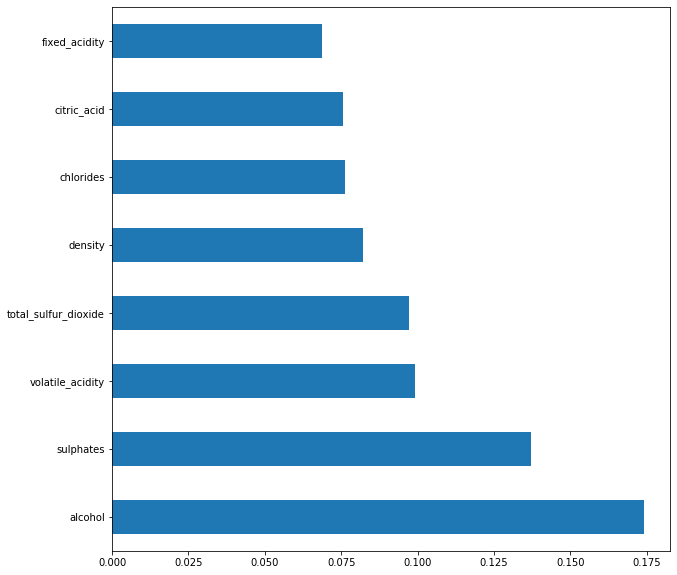

In [68]:
#Passing the randon forest and plotting a graph what are the important features using Feature importance 
feat_importances = pd.Series(random_fc.feature_importances_, index=X.columns)
#Plotting the top 10 Features
feat_importances.nlargest(8).plot(kind='barh',figsize=(10,10))

## 4. Artificial-Neural Network: 

In [21]:
neaurl = MLPClassifier(hidden_layer_sizes=(3,3,3), max_iter = 500, random_state=10)
neaurl.fit(X_train_new, y_train_new)
pred_neaurl = neaurl.predict(X_test)
accuracy_score(y_test,pred_neaurl)*100

44.6875

In [22]:
print(classification_report(y_test, pred_neaurl))
print(confusion_matrix(y_test, pred_neaurl))

                precision    recall  f1-score   support

  High Quality       0.15      0.60      0.24        30
   Low Quality       0.65      0.67      0.66       167
Medium Quality       0.48      0.11      0.17       123

      accuracy                           0.45       320
     macro avg       0.43      0.46      0.36       320
  weighted avg       0.54      0.45      0.43       320

[[ 18  10   2]
 [ 43 112  12]
 [ 59  51  13]]


## 5. Decision Tree: 

In [23]:
trees = DecisionTreeClassifier(max_depth=10, random_state=1, max_features = None, min_samples_leaf = 250)
trees.fit(X_train_new, y_train_new)
pred_dtree=trees.predict(X_test)
accuracy_score(y_test,pred_dtree)*100

57.49999999999999

In [24]:
print(classification_report(y_test, pred_dtree))
print(confusion_matrix(y_test, pred_dtree))

                precision    recall  f1-score   support

  High Quality       0.33      0.63      0.44        30
   Low Quality       0.76      0.62      0.68       167
Medium Quality       0.48      0.50      0.49       123

      accuracy                           0.57       320
     macro avg       0.53      0.58      0.54       320
  weighted avg       0.61      0.57      0.59       320

[[ 19   0  11]
 [  9 104  54]
 [ 29  33  61]]


## 6. Logistic Regression: 

In [25]:
logr =  LogisticRegression(random_state=126)
logr.fit(X_train_new, y_train_new)
pred_logr =logr.predict(X_test)
accuracy_score(y_test,pred_logr)*100

62.5

In [26]:
print(classification_report(y_test, pred_logr))
print(confusion_matrix(y_test, pred_logr))

                precision    recall  f1-score   support

  High Quality       0.38      0.90      0.53        30
   Low Quality       0.74      0.77      0.76       167
Medium Quality       0.59      0.36      0.44       123

      accuracy                           0.62       320
     macro avg       0.57      0.68      0.58       320
  weighted avg       0.65      0.62      0.62       320

[[ 27   1   2]
 [  9 129  29]
 [ 35  44  44]]


## 7. Naive Bayes classifier: 

In [27]:
nb =  GaussianNB()
nb.fit(X_train_new, y_train_new)
pred_nb =nb.predict(X_test)
accuracy_score(y_test,pred_nb)*100

57.49999999999999

In [28]:
print(classification_report(y_test, pred_nb))
print(confusion_matrix(y_test, pred_nb))

                precision    recall  f1-score   support

  High Quality       0.28      0.80      0.41        30
   Low Quality       0.76      0.74      0.75       167
Medium Quality       0.51      0.30      0.38       123

      accuracy                           0.57       320
     macro avg       0.52      0.61      0.51       320
  weighted avg       0.62      0.57      0.57       320

[[ 24   0   6]
 [ 15 123  29]
 [ 47  39  37]]


## 8. XG BOOST CLASSIFIER: 

In [29]:
xg = XGBClassifier()
xg.fit(X_train_new, y_train_new)
# make predictions for test data
y_pred = xg.predict(X_test)
# evaluate predictions
accuracy_score(y_test, y_pred)*100

[11:09:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


71.875

In [30]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

                precision    recall  f1-score   support

  High Quality       0.49      0.83      0.62        30
   Low Quality       0.80      0.84      0.82       167
Medium Quality       0.68      0.53      0.60       123

      accuracy                           0.72       320
     macro avg       0.66      0.73      0.68       320
  weighted avg       0.73      0.72      0.72       320

[[ 25   2   3]
 [  0 140  27]
 [ 26  32  65]]


# Plotting ROC for Randomn Forest

In [131]:
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [132]:
#Listing out all the available clumns in the data 
numeric_features=numeric_features = df.describe().columns[:-1]

In [133]:
#Encoding is a technique for converting any categorical values into numeric values 
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['wine_quality'] = label.fit_transform(df['wine_quality'])

In [134]:

df['wine_quality'].head(10)

0    1
1    1
2    1
3    2
4    1
5    1
6    1
7    0
8    0
9    1
Name: wine_quality, dtype: int32

In [135]:
numeric_features=numeric_features = df.describe().columns[:-1]

In [136]:
y_label = df.wine_quality

In [137]:
y_label

0       1
1       1
2       1
3       2
4       1
       ..
1594    1
1595    2
1596    2
1597    1
1598    2
Name: wine_quality, Length: 1599, dtype: int32

In [138]:
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Binarize the output
y_label = label_binarize(y_label, classes=[0,1,2])
n_classes = y_label.shape[1]

# shuffle and split training and test sets
X_train_rc,X_test_rc,y_train_rc,y_test_rc = train_test_split(X,y_label,test_size=0.2,random_state=38)


# Define preprocessing for numeric columns (normalize them so they're on the same scale)
 
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# Combine preprocessing steps
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features)])
        
# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('randomforest', RandomForestClassifier())])


# fit the pipeline to train a random forest classifier model on the training set

rfc = pipeline.fit(X_train_rc, (y_train_rc))

predictions =rfc.predict(X_test_rc)

print(classification_report(y_test_rc,predictions))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_rc[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area

fpr["micro"], tpr["micro"], _ = roc_curve(y_test_rc.ravel(), predictions.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

              precision    recall  f1-score   support

           0       0.77      0.57      0.65        30
           1       0.85      0.77      0.81       167
           2       0.70      0.58      0.63       123

   micro avg       0.79      0.68      0.73       320
   macro avg       0.77      0.64      0.70       320
weighted avg       0.78      0.68      0.73       320
 samples avg       0.68      0.68      0.68       320



In [140]:
accuracy_score(y_test_rc,predictions)*100

67.8125

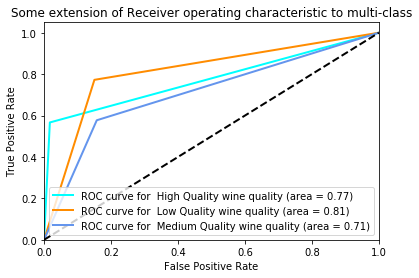

In [141]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves

colors = cycle(['aqua', 'darkorange', 'cornflowerblue','green','blue','red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve for  {0} wine quality (area = {1:0.2f})'
             ''.format(label.classes_[i], roc_auc[i]))    
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


In [40]:
df['wine_quality']

0       1
1       1
2       1
3       2
4       1
       ..
1594    1
1595    2
1596    2
1597    1
1598    2
Name: wine_quality, Length: 1599, dtype: int32

# Model Interpretation Methods: 

* Permutation Importance - ELI5: Explain like I am a 5-year old


* LIME: Local Interpretable Model-Agnostic Explanations


* SHAP: SHapley Additive exPlanations


* YELLOW BRICK: Yellowbrick uses the concept of ‘Visualisers’. Visualizers are a set of tools that help us visualize the features in our data considering individual datapoints.

# 1. Permutation Importance - ELI5:

### ELI5 FOR Random Forest:

In [142]:
#ELIS is a libraby used to weigh the features in the data 
import eli5
from eli5.sklearn import PermutationImportance
#Passing our randomforest _fc model to PermutationImportance 
perm = PermutationImportance(random_fc, random_state=1).fit(X,y)
eli5.show_weights(perm, feature_names = X.columns.tolist())

In [42]:
y

0          Low Quality
1          Low Quality
2          Low Quality
3       Medium Quality
4          Low Quality
             ...      
1594       Low Quality
1595    Medium Quality
1596    Medium Quality
1597       Low Quality
1598    Medium Quality
Name: wine_quality, Length: 1599, dtype: object

### ELI5 FOR XG Boost Classifier:

In [43]:
#Fitting our high predicted algorithm XG boost and predicting the feature weights
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(xg, random_state=1).fit(X,y)
eli5.show_weights(perm, feature_names = X.columns.tolist())

### ELI5 For KNN:

In [44]:
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(knn_clf, random_state=1).fit(X,y)
eli5.show_weights(perm, feature_names = X.columns.tolist())

### PDP PLOT FOR EACH FEATURE:

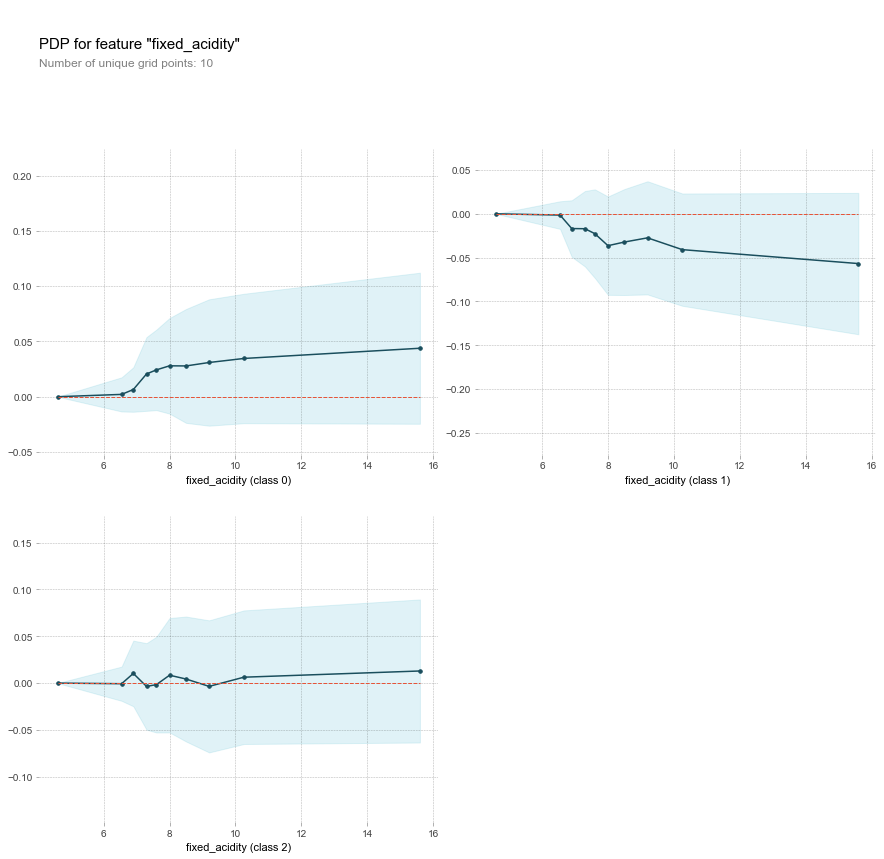

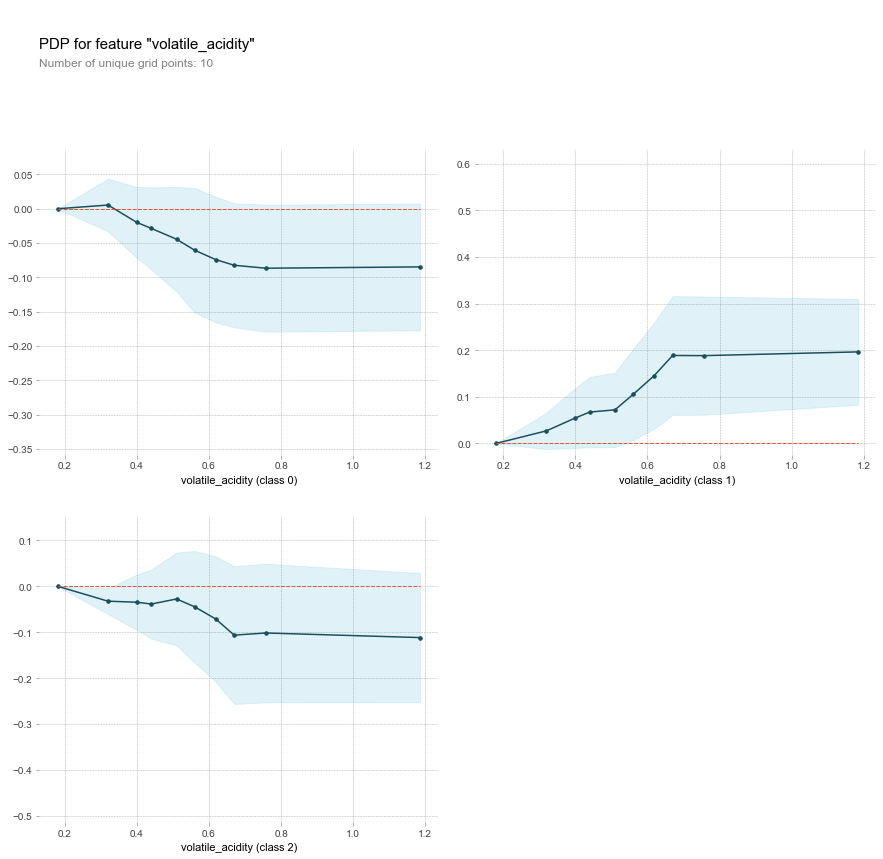

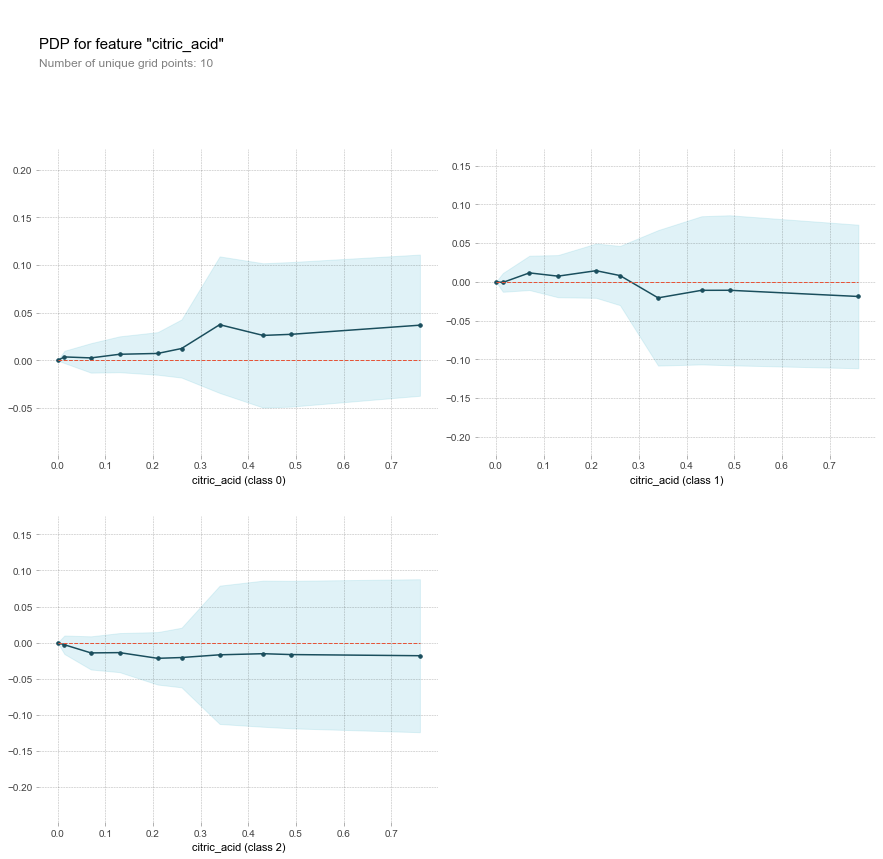

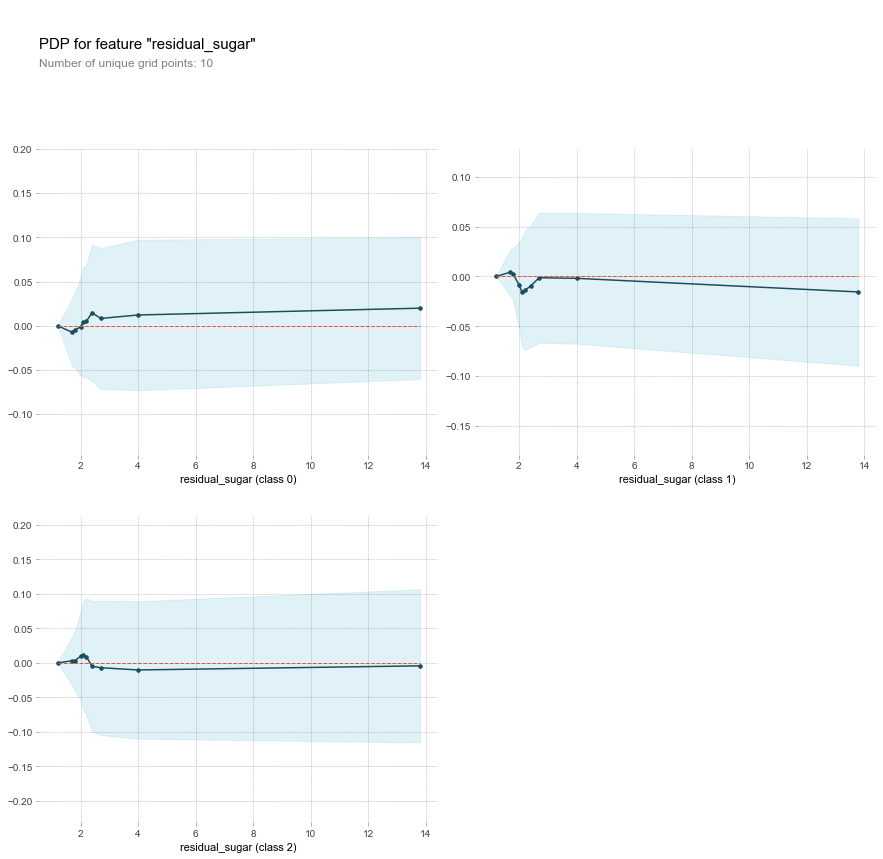

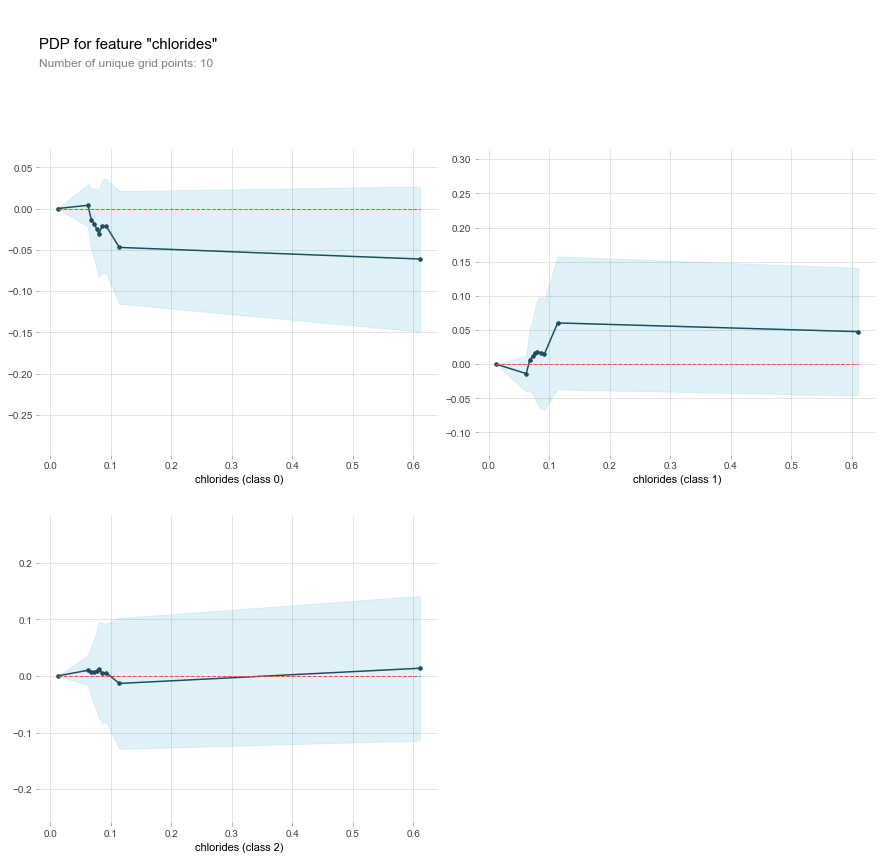

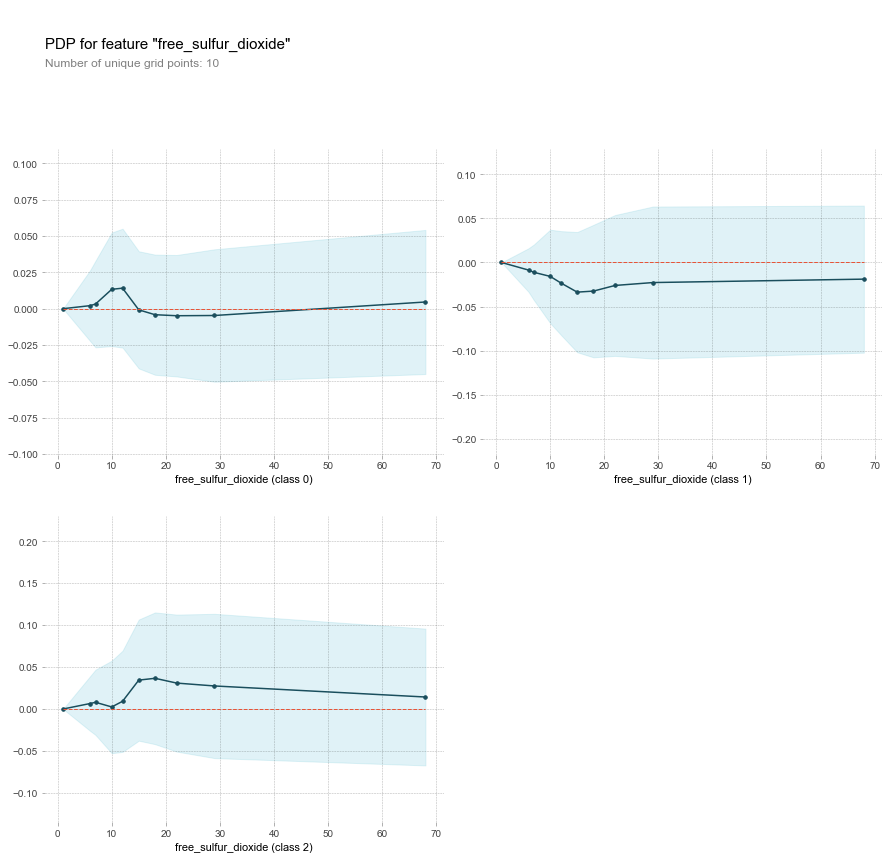

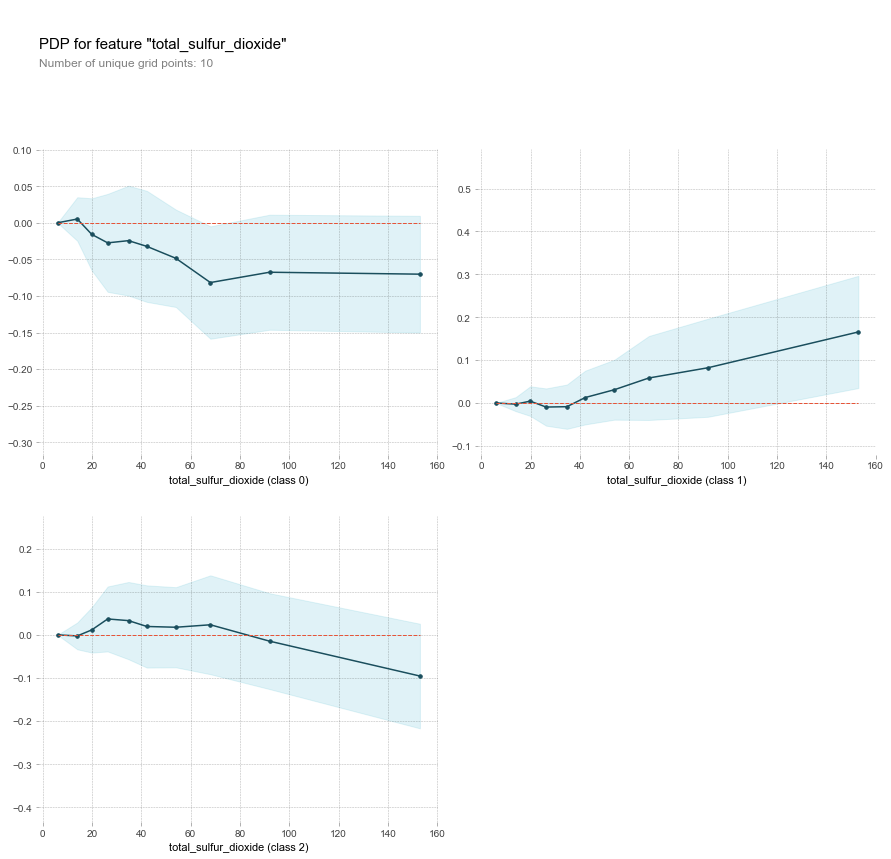

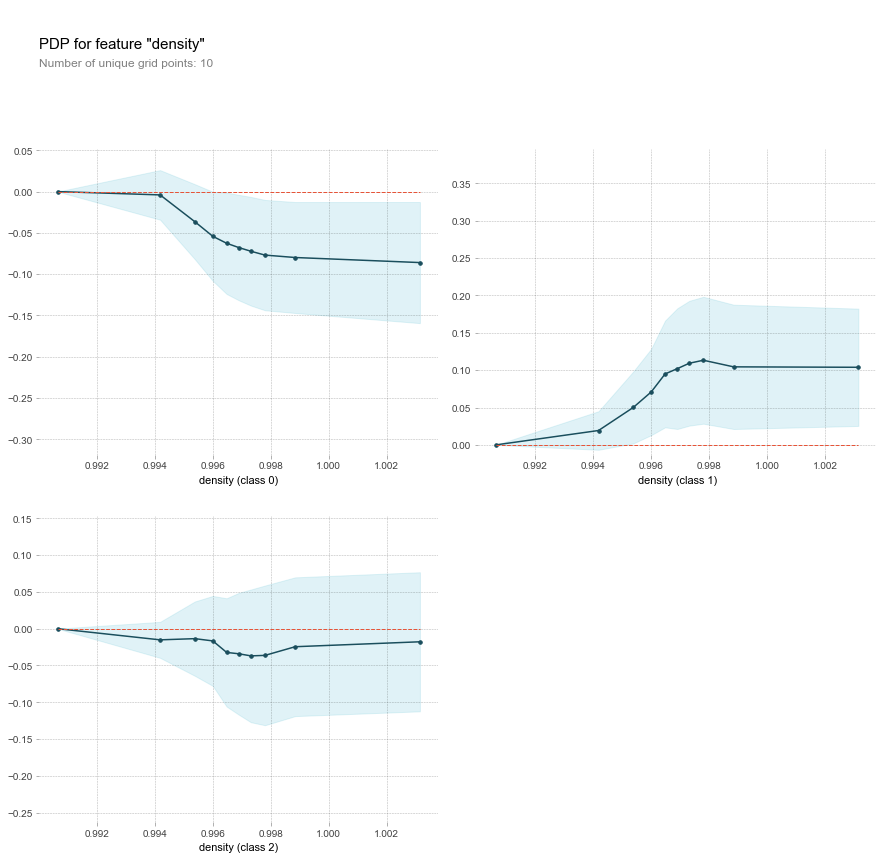

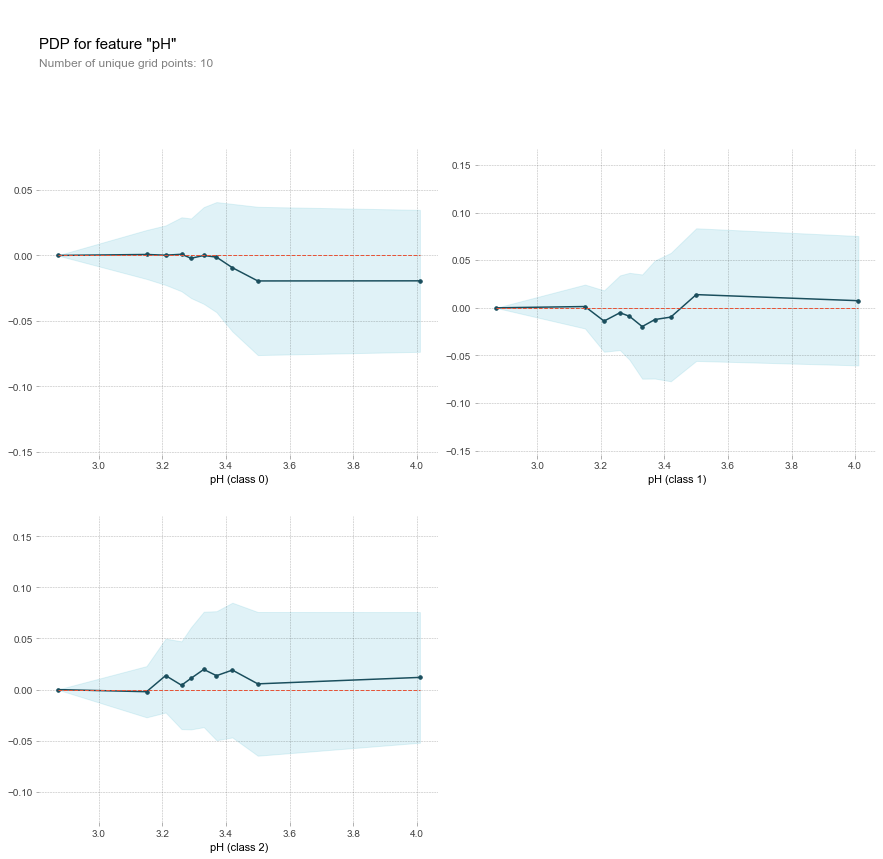

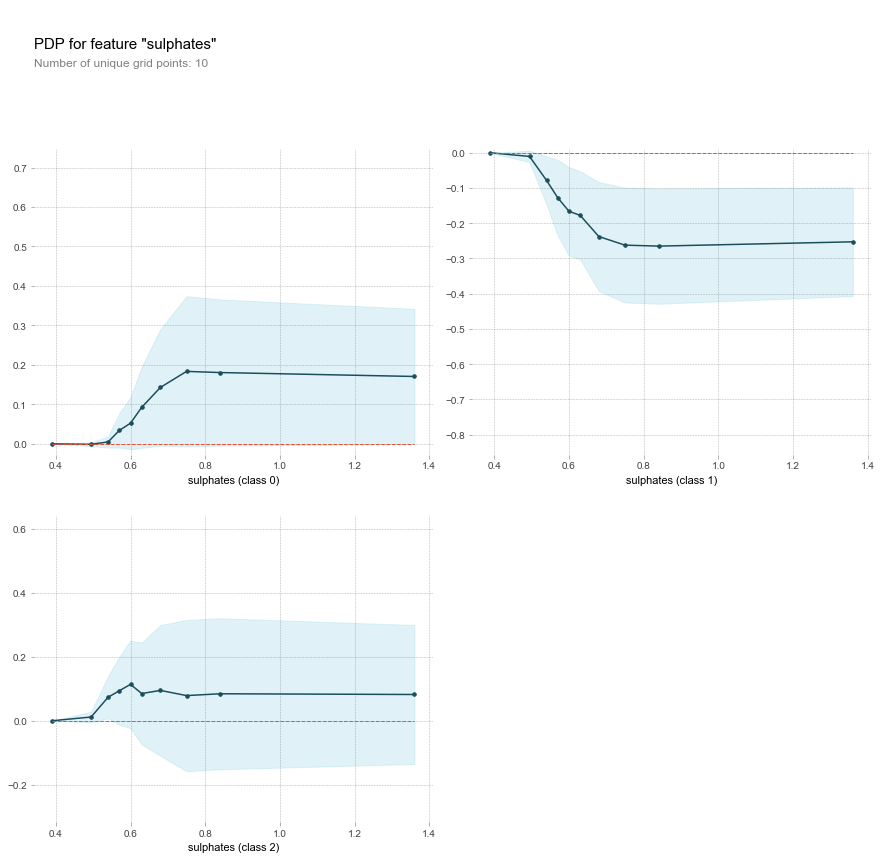

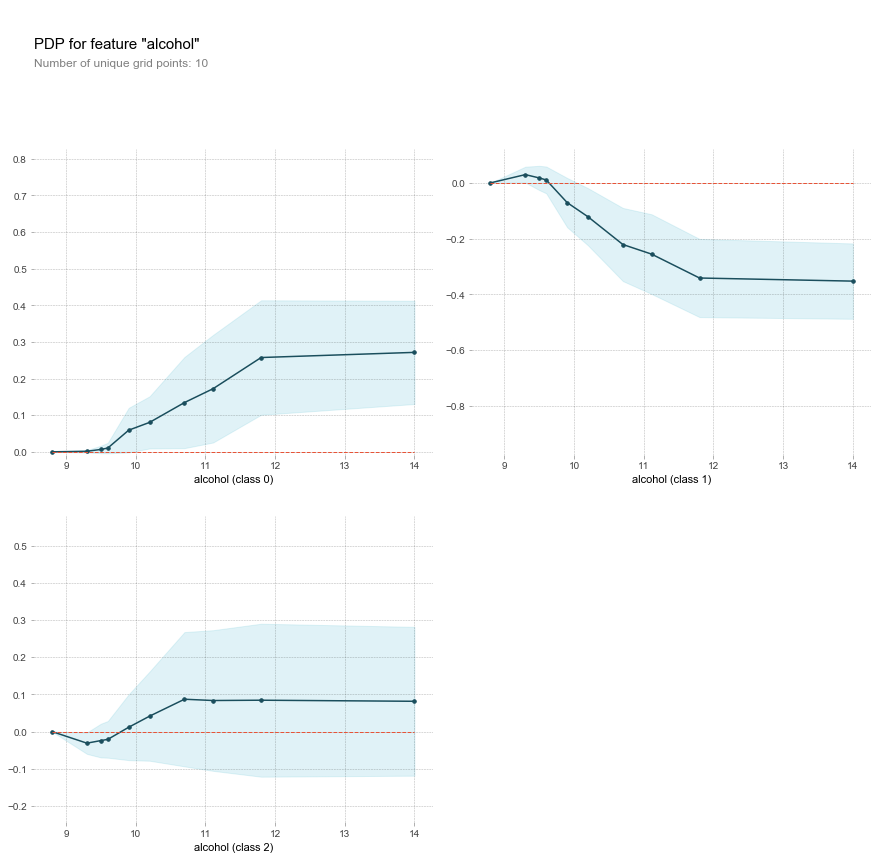

In [143]:
#Plotting pdp plot for each feature in the  data 
from matplotlib import pyplot as plt
#Importing pdp
from pdpbox import pdp
#Listing the features
features = list(X.columns)
#For each feature aassigning the random forest and plotting the graph
#Here class 0 is for High Quality class 1 is for Low Quality and class 2 is for Medium Quality
for i in features:
    pdp_each = pdp.pdp_isolate(model=random_fc, dataset=X_test, model_features=features, feature=i)
    fig, axes = pdp.pdp_plot(pdp_each, i)

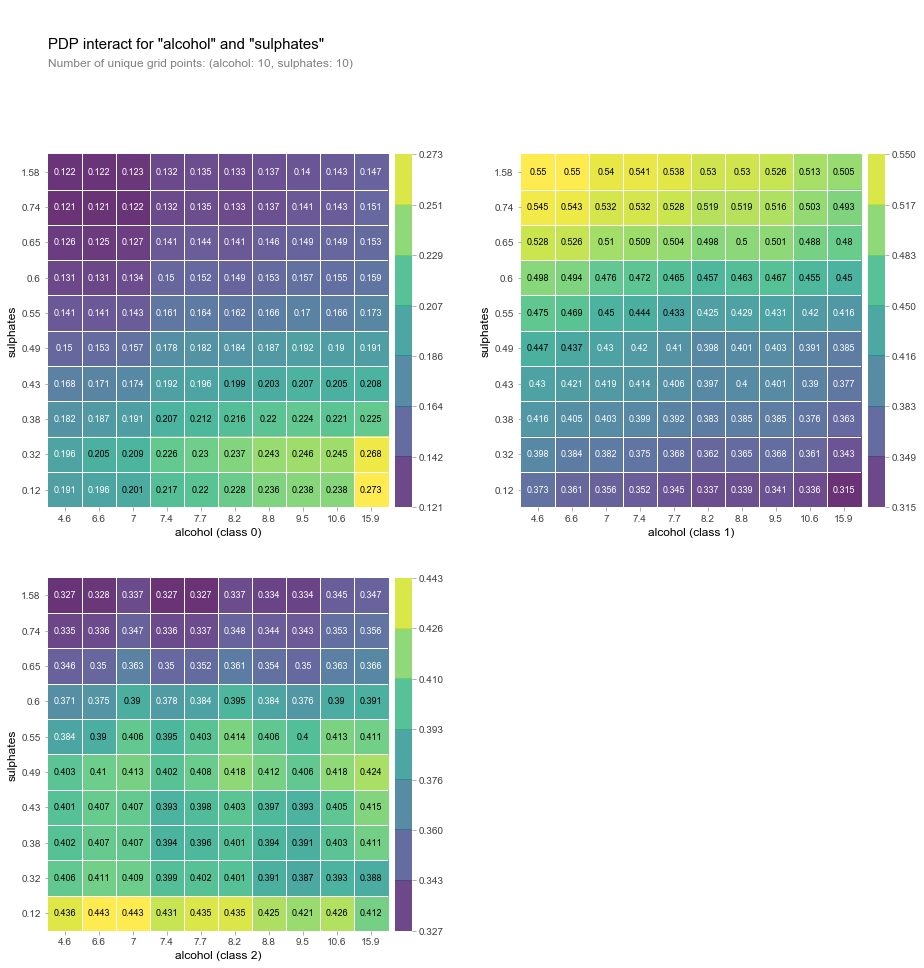

In [46]:
features_to_plot = ['alcohol', 'sulphates']
pdp_1  =  pdp.pdp_interact(model=random_fc, dataset=X, model_features=X.columns, features=X.columns)
pdp.pdp_interact_plot(pdp_interact_out=pdp_1, feature_names=features_to_plot, plot_type='grid')
plt.show()

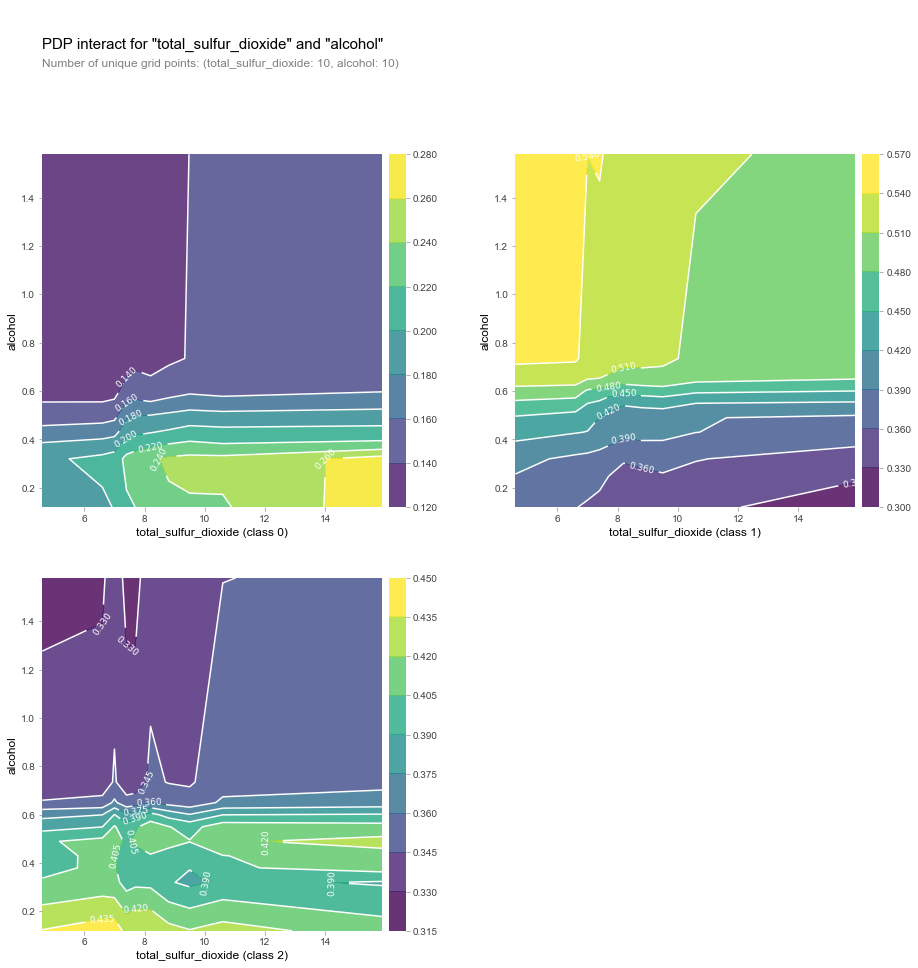

In [47]:
features_to_plot = ['total_sulfur_dioxide','alcohol']
pdp_2  =  pdp.pdp_interact(model=random_fc, dataset=X, model_features=X.columns, features=X.columns)
pdp.pdp_interact_plot(pdp_interact_out=pdp_2, feature_names=features_to_plot, plot_type='contour')
plt.show()

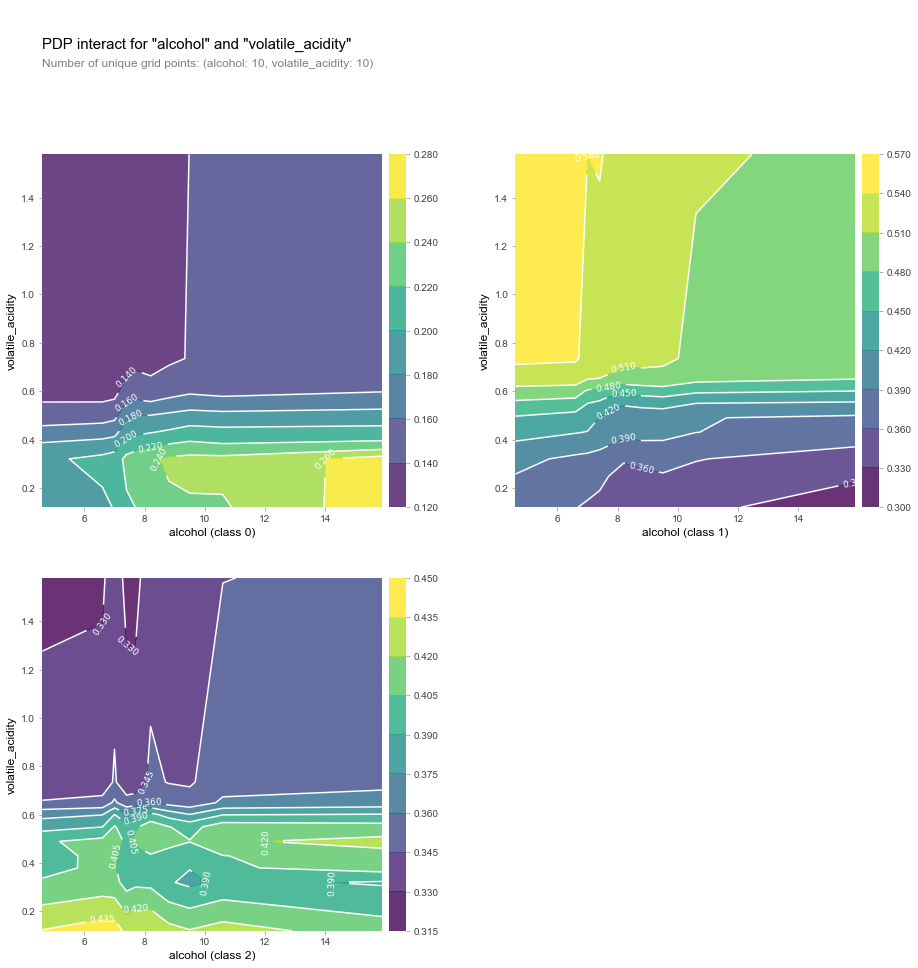

In [48]:
features_to_plot = ['alcohol','volatile_acidity']
inter1  =  pdp.pdp_interact(model=random_fc, dataset=X, model_features=X.columns, features=X.columns)
pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour')
plt.show()

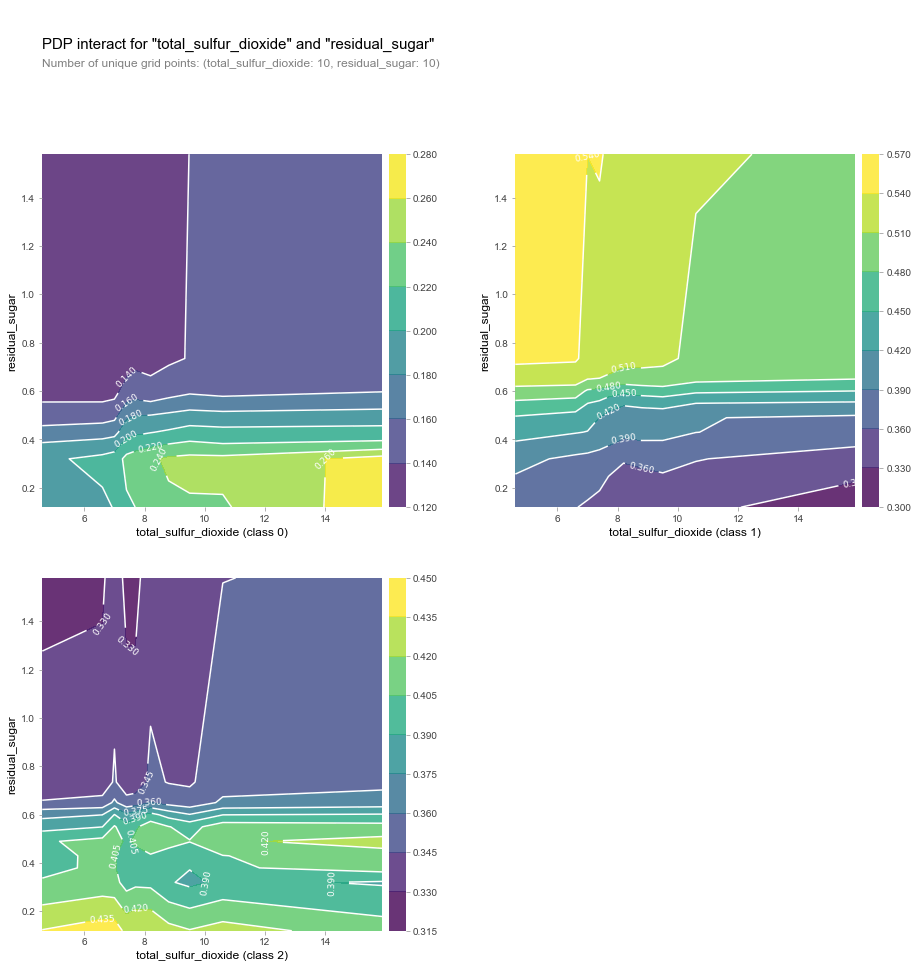

In [49]:
features_to_plot = ['total_sulfur_dioxide','residual_sugar']
inter1  =  pdp.pdp_interact(model=random_fc, dataset=X, model_features=X.columns, features=X.columns)
pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour')
plt.show()

In [50]:
pip install lime

Note: you may need to restart the kernel to use updated packages.


# LIME:

In [144]:
#Installing and importing Lime 
import lime

from lime import lime_tabular

interpretor = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X.columns,
    class_names=['High Quality','Low Quality','Medium Quality'],
    mode='classification')

In [145]:
class_names=['High Quality','Low Quality','Medium Quality']

In [150]:
# considering a partiular row value and diplaying all the features
X_train.iloc[14]

fixed_acidity           10.3000
volatile_acidity         0.4100
citric_acid              0.4200
residual_sugar           2.4000
chlorides                0.2130
free_sulfur_dioxide      6.0000
total_sulfur_dioxide    14.0000
density                  0.9994
pH                       3.1900
sulphates                0.6200
alcohol                  9.5000
Name: 307, dtype: float64

In [151]:
#checking the output in the original model
y_train[14]

'Low Quality'

In [152]:
#By using Lime displaying what features are driving to this class prediction 
exp = interpretor.explain_instance(
    data_row=X_train.iloc[14], 
    predict_fn=random_fc.predict_proba,top_labels=3
)

exp.show_in_notebook(show_table=True)

In [56]:
y_train_new[14]

'Medium Quality'

In [153]:
exp = interpretor.explain_instance(
    data_row=X_train_new.iloc[102], 
    predict_fn=random_fc.predict_proba,top_labels=4
)
exp.show_in_notebook(show_table=True)

In [154]:
y_train_new.iloc[102]

'Medium Quality'

## SHAP: 

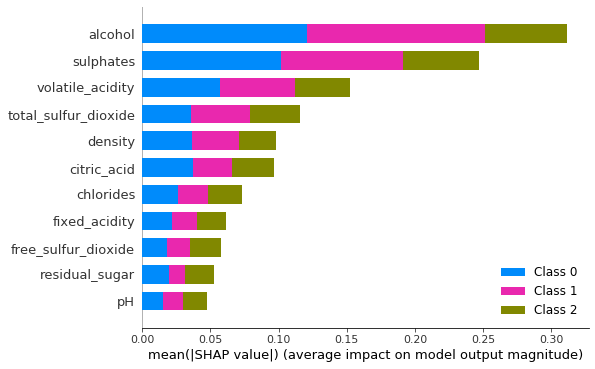

In [175]:
import shap
#Overall Explanation of how data is distributed in terms of class 0 High Quality,class 1 Low Quality and Class 2 Medium Quality
shap_values = shap.TreeExplainer(random_fc).shap_values(X_train_new)
shap.summary_plot(shap_values, X_train_new, plot_type="bar")

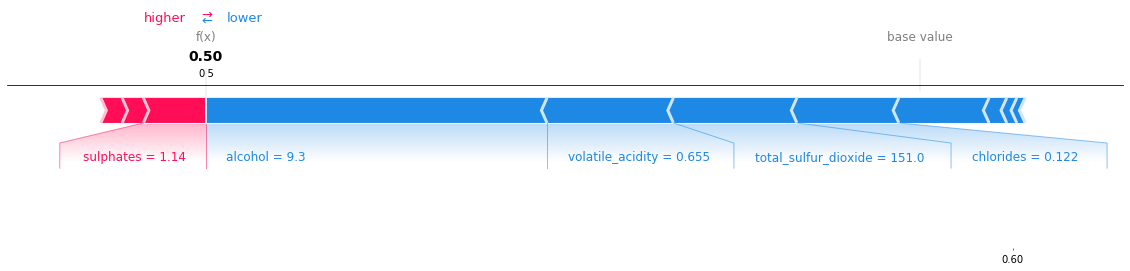

In [207]:
#Predicting the value for the zeroth index 
#shap values saves all the vvalues in multidimensional arrays as we have 3 classes the length of the array is 3
explainer = shap.TreeExplainer(random_fc)
shap.force_plot(explainer.expected_value[0], shap_values[0][0] ,X_train_new.iloc[0],link="logit", matplotlib=True)
shap.initjs()

In [248]:
X_train_new.iloc[0]

fixed_acidity             8.500
volatile_acidity          0.655
citric_acid               0.490
residual_sugar            6.100
chlorides                 0.122
free_sulfur_dioxide      34.000
total_sulfur_dioxide    151.000
density                   1.001
pH                        3.310
sulphates                 1.140
alcohol                   9.300
Name: 0, dtype: float64

In [249]:
y_train_new.iloc[0]

'Low Quality'

In [246]:
explainer.expected_value

array([0.35900887, 0.32116846, 0.31982267])

In [ ]:
X_train_new.iloc[0,:]


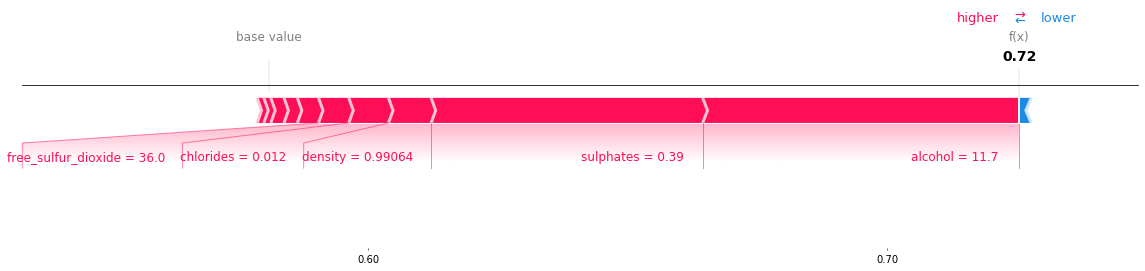

In [255]:
shap.force_plot(explainer.expected_value[1], shap_values[1][1,:], X_train_new.iloc[1000],link="logit", matplotlib=True)

In [251]:
    y_train_new[1000]

'High Quality'

In [250]:
X_train_new.iloc[1000]

fixed_acidity             6.70000
volatile_acidity          0.28000
citric_acid               0.28000
residual_sugar            2.40000
chlorides                 0.01200
free_sulfur_dioxide      36.00000
total_sulfur_dioxide    100.00000
density                   0.99064
pH                        3.26000
sulphates                 0.39000
alcohol                  11.70000
Name: 1000, dtype: float64

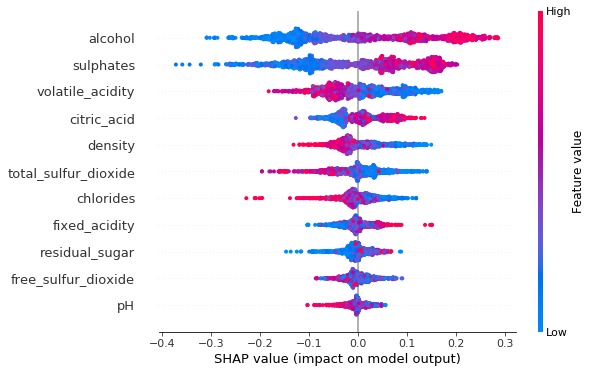

In [252]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(random_fc)

# calculate shap values. This is what we will plot.
shap_values = explainer.shap_values(X_train_new)

shap.summary_plot(shap_values[0], X_train_new)

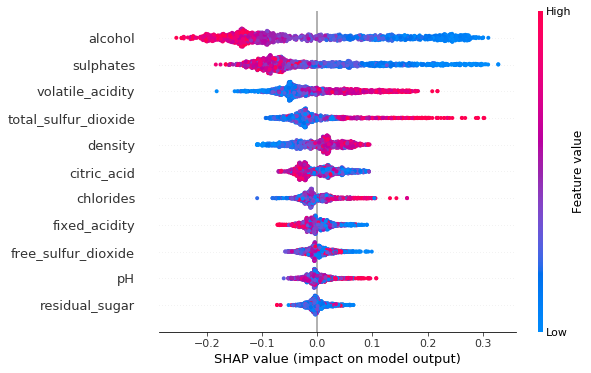

In [260]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(random_fc)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(X_train_new)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values[1], X_train_new)

In [ ]:
shap.dependence_plot("alcohol", shap_values[2], X_train_new)

In [226]:
X_train_new

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0          8.500000          0.655000     0.490000        6.100000   0.122000   
1          8.600000          0.520000     0.380000        1.500000   0.096000   
2         12.000000          0.390000     0.660000        3.000000   0.093000   
3          7.400000          0.600000     0.260000        2.100000   0.083000   
4          7.800000          0.520000     0.250000        1.900000   0.081000   
...             ...               ...          ...             ...        ...   
1574      10.715136          0.434171     0.488857        2.629147   0.065531   
1575      11.413313          0.592388     0.424077        2.619467   0.081027   
1576       6.236972          0.431856     0.119470        2.442122   0.062950   
1577       9.533839          0.368135     0.419219        2.186768   0.078210   
1578       8.323701          0.529858     0.120854        1.780569   0.067986   

      free_sulfur_dioxide  total_sulfur_dioxide   density        pH  \
0               34.000000            151.000000  1.001000  3.310000   
1                5.000000             18.000000  0.996660  3.200000   
2               12.000000             30.000000  0.999600  3.180000   
3               17.000000             91.000000  0.996160  3.290000   
4               14.000000             38.000000  0.998400  3.430000   
...                   ...                   ...       ...       ...   
1574             5.000000             18.000000  0.997271  3.199372   
1575             6.000000             31.805325  1.000172  3.133627   
1576            14.000000             27.789392  0.994104  3.552606   
1577             7.000000             26.377441  0.995835  3.181323   
1578             7.402847             17.000000  0.997053  3.284171   

      sulphates    alcohol  
0      1.140000   9.300000  
1      0.520000   9.400000  
2      0.630000  10.800000  
3      0.560000   9.800000  
4      0.650000   9.000000  
...         ...        ...  
1574   0.848744  11.184864  
1575   0.764426  10.583195  
1576   0.653151  11.978785  
1577   0.541323  11.631886  
1578   0.668199   9.843132  

[1579 rows x 11 columns]

In [232]:
shap_values[0][1578]

array([-0.00544995, -0.03545894, -0.05227836, -0.03827305,  0.00279301,
       -0.02091816,  0.00509386, -0.03667661, -0.00860271,  0.02027928,
       -0.13951723])

In [190]:
shap_values = explainer.shap_values(X_train_new)

In [197]:
print(shap_values[2])

[[-0.00586188 -0.02678967 -0.00501177 ...  0.00396102  0.01574751
  -0.07296632]
 [-0.00580332  0.01145456 -0.01417368 ... -0.01381284 -0.10944785
  -0.111592  ]
 [-0.0129022  -0.01069781 -0.05687013 ... -0.01780195  0.01311853
  -0.00137984]
 ...
 [ 0.05809085  0.05241119  0.05790695 ...  0.03533391  0.10420569
   0.05011626]
 [ 0.01224634  0.03514947  0.01109555 ...  0.00602873  0.22909429
   0.07246391]
 [ 0.03310347  0.10663784  0.05278924 ...  0.03157813  0.06896078
   0.07705177]]
